<a href="https://colab.research.google.com/github/ajazturki10/Model-Optimization/blob/main/Model_Optimization_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Define Hyperparameters

batch_size = 128
learning_rate = 0.01
momentum = 0.9
epochs = 10

In [3]:
# Load the MNIST dataset

train_dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 413869865.85it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40151042.04it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 160543465.26it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 25165824.00it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# Define the neural network model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

In [5]:
# Define the loss function

criterion = nn.CrossEntropyLoss()

In [6]:
# Define the different optimizers to compare

momentum_optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
nag_optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
rmsprop_optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)
adagrad_optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)

optimizers = [momentum_optimizer, nag_optimizer, rmsprop_optimizer, adagrad_optimizer, adam_optimizer]
optimizer_names = ['Momentum', 'NAG', 'RMSProp', 'AdaGrad', 'Adam']

In [7]:
# Train the model with each optimizer and record the training and testing accuracy for each epoch

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for optimizer, optimizer_name in zip(optimizers, optimizer_names):
    print(f'Training with {optimizer_name} optimizer...')
    optimizer_train_losses = []
    optimizer_train_accuracies = []
    optimizer_test_losses = []
    optimizer_test_accuracies = []
    
    for epoch in range(epochs):
        train_loss = 0
        train_correct = 0
        test_loss = 0
        test_correct = 0
        
        # Train the model
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_correct += (output.argmax(dim=1) == target).sum().item()
        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        optimizer_train_losses.append(train_loss)
        optimizer_train_accuracies.append(train_acc)
        
        # Evaluate the model on the
        # Evaluate the model on the test dataset
        model.eval()
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
                test_correct += (output.argmax(dim=1) == target).sum().item()
            test_loss /= len(test_loader.dataset)
            test_acc = test_correct / len(test_loader.dataset)
            optimizer_test_losses.append(test_loss)
            optimizer_test_accuracies.append(test_acc)

        print(f'Epoch [{epoch+1}/{epochs}] Train Loss: {train_loss:.4f} Test Loss: {test_loss:.4f} Train Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}')
    
    train_losses.append(optimizer_train_losses)
    train_accuracies.append(optimizer_train_accuracies)
    test_losses.append(optimizer_test_losses)
    test_accuracies.append(optimizer_test_accuracies)

Training with Momentum optimizer...
Epoch [1/10] Train Loss: 0.0048 Test Loss: 0.0024 Train Accuracy: 0.8451 Test Accuracy: 0.9100
Epoch [2/10] Train Loss: 0.0023 Test Loss: 0.0020 Train Accuracy: 0.9172 Test Accuracy: 0.9299
Epoch [3/10] Train Loss: 0.0018 Test Loss: 0.0016 Train Accuracy: 0.9332 Test Accuracy: 0.9406
Epoch [4/10] Train Loss: 0.0016 Test Loss: 0.0014 Train Accuracy: 0.9441 Test Accuracy: 0.9463
Epoch [5/10] Train Loss: 0.0013 Test Loss: 0.0012 Train Accuracy: 0.9514 Test Accuracy: 0.9534
Epoch [6/10] Train Loss: 0.0012 Test Loss: 0.0011 Train Accuracy: 0.9570 Test Accuracy: 0.9580
Epoch [7/10] Train Loss: 0.0010 Test Loss: 0.0010 Train Accuracy: 0.9623 Test Accuracy: 0.9611
Epoch [8/10] Train Loss: 0.0009 Test Loss: 0.0009 Train Accuracy: 0.9663 Test Accuracy: 0.9645
Epoch [9/10] Train Loss: 0.0009 Test Loss: 0.0009 Train Accuracy: 0.9698 Test Accuracy: 0.9667
Epoch [10/10] Train Loss: 0.0008 Test Loss: 0.0008 Train Accuracy: 0.9721 Test Accuracy: 0.9680
Training with

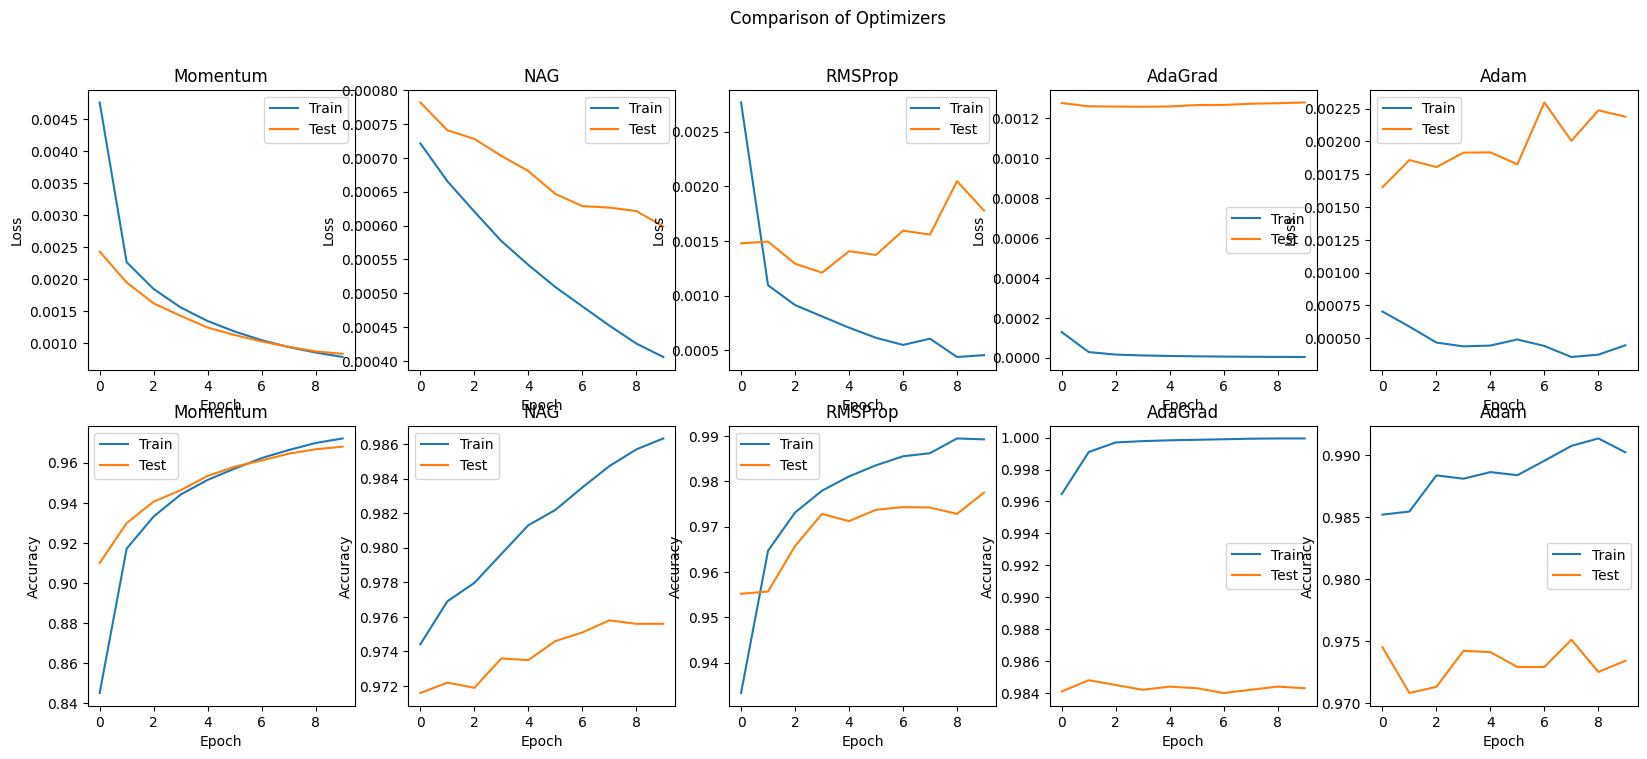

In [8]:
# Plot the results for each optimizer
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Comparison of Optimizers')
for i in range(5):
    axs[0, i].plot(train_losses[i], label='Train')
    axs[0, i].plot(test_losses[i], label='Test')
    axs[0, i].set_title(optimizer_names[i])
    axs[0, i].set_xlabel('Epoch')
    axs[0, i].set_ylabel('Loss')
    axs[0, i].legend()
    
    axs[1, i].plot(train_accuracies[i], label='Train')
    axs[1, i].plot(test_accuracies[i], label='Test')
    axs[1, i].set_title(optimizer_names[i])
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Accuracy')
    axs[1, i].legend()

plt.show()